# Montagem do Colab para manipulação dos arquivos do Dataset e dos keypoints

In [1]:
# Conectar ao Drive para acessar os dados do dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importações das bibliotecas necessárias para a manipulação dos dados (bibliotecas recomendadas pelo site recomendadas no link da atividade)

In [2]:
# Bibliotecas necessárias
import os
import json
import cv2
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Carrega os dados do dataset e dos keypoints

In [3]:
# Carregar o local do dataset e dos keypoints
IMAGES_DATASET = '/content/drive/MyDrive/Atividade Animal Pose Estimation - Hayashi/images_dataset/images'

In [4]:
# Carregando o arquivo JSON
with open('/content/drive/MyDrive/Atividade Animal Pose Estimation - Hayashi/keypoints.json') as f:
    keypoints = json.load(f)

# Montagem do dicionário para conectar os keypoints às imagens do Dataset

In [5]:
# Criando um dicionário para armazenar os dados das imagens
image_data = {}

# Análise exploratória simples das imagens

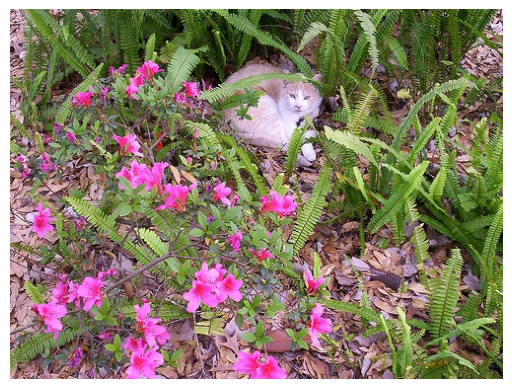

In [20]:
# Pegar algumas imagens do dataset
image_path = []
for filename in os.listdir(IMAGES_DATASET):
  if filename.endswith('.jpg' or '.jpeg'):
    image_path.append(os.path.join(IMAGES_DATASET, filename))
images = Image.open(random.choice(image_path))

# Imprime as imagens
plt.imshow(images)
plt.axis('off')
plt.show()

In [21]:
# Visualização de tamanho, formato e canais da imagem
print(images.size)
print(images.format)
print(images.mode)

(500, 375)
JPEG
RGB


In [22]:
# Calcula as estatísticas básicas
print(np.mean(images))
print(np.std(images))
print(np.min(images))
print(np.max(images))

110.61734755555555
59.44843462097668
0
255


# Destacando os bovinos dentre os outros animais do dataset

In [23]:
# Lê o JSON e visualiza as categorias
with open('/content/drive/MyDrive/Atividade Animal Pose Estimation - Hayashi/keypoints.json') as f:
    keypoints = json.load(f)
print(keypoints['categories'])

[{'supercategory': 'animal', 'id': 1, 'name': 'dog', 'keypoints': ['left_eye', 'right_eye', 'nose', 'left_ear', 'right_ear', 'left_front_elbow', 'right_front_elbow', 'left_back_elbow', 'right_back_elbow', 'left_front_knee', 'right_front_knee', 'left_back_knee', 'right_back_knee', 'left_front_paw', 'right_front_paw', 'left_back_paw', 'right_back_paw', 'throat', 'withers', 'tailbase'], 'skeleton': [[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 17], [18, 19], [5, 9], [6, 10], [7, 11], [8, 12], [9, 13], [10, 14], [11, 15], [12, 16]]}, {'supercategory': 'animal', 'id': 2, 'name': 'cat', 'keypoints': ['left_eye', 'right_eye', 'nose', 'left_ear', 'right_ear', 'left_front_elbow', 'right_front_elbow', 'left_back_elbow', 'right_back_elbow', 'left_front_knee', 'right_front_knee', 'left_back_knee', 'right_back_knee', 'left_front_paw', 'right_front_paw', 'left_back_paw', 'right_back_paw', 'throat', 'withers', 'tailbase'], 'skeleton': [[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 17], [18, 19], [5, 9],

<BarContainer object of 5 artists>

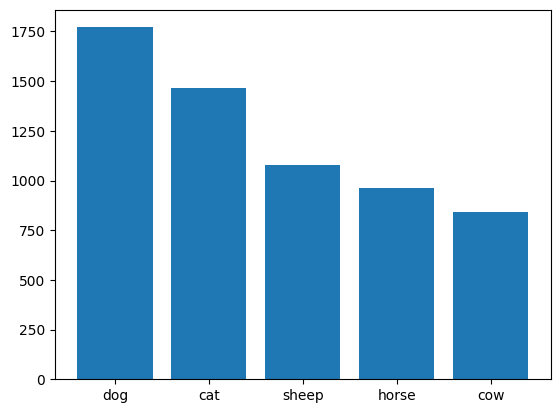

In [24]:
# Contar animais por categoria e mostrar um gráfico de barras
categories = [category['name'] for category in keypoints['categories']]
counts = [len([annotation for annotation in keypoints['annotations'] if annotation['category_id'] == category_id]) for category_id in range(1, len(categories) + 1)]

plt.bar(categories, counts)

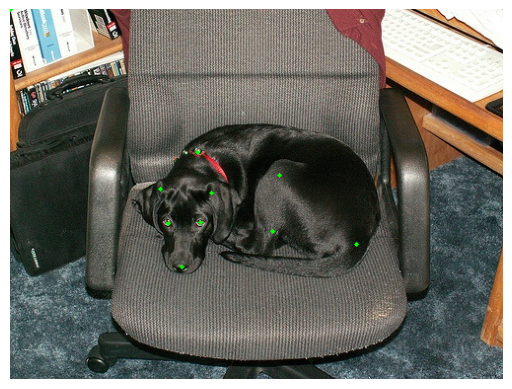

In [31]:
# Plotagem das imagens com os pontos chave
def plot_image_with_keypoints(image_path, keypoints=None, bbox=None):
    images = Image.open(image_path)

    if bbox is not None:
        x, y, w, h = bbox
    # Convert PIL Image to OpenCV format (numpy array)
    image_cv = cv2.cvtColor(np.array(images), cv2.COLOR_RGB2BGR)

    if keypoints is not None:
        for keypoint in keypoints:
            x, y = keypoint[:2]  # Slice to get x, y
            cv2.circle(image_cv, (int(x), int(y)), 2, (0, 255, 0), -1)

    # Convert back to PIL Image for plotting with matplotlib
    image_pil = Image.fromarray(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))

    plt.imshow(image_pil)
    plt.axis('off')
    plt.show()

plot_image_with_keypoints("/content/drive/MyDrive/Atividade Animal Pose Estimation - Hayashi/images_dataset/images/2007_000063.jpg", keypoints['annotations'][0]['keypoints'], keypoints['annotations'][0]['bbox'])

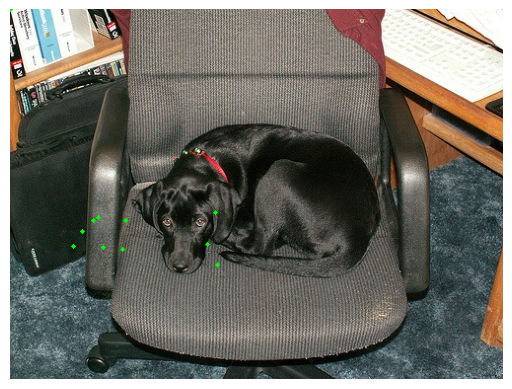

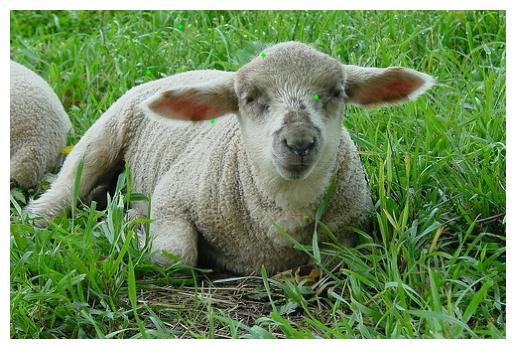

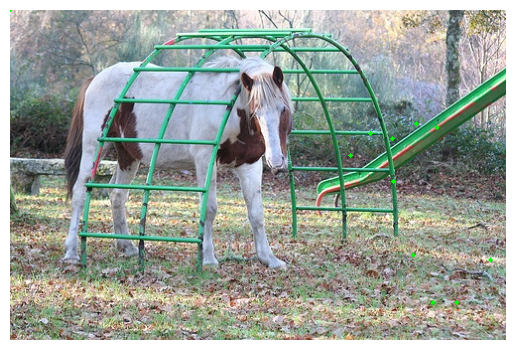

In [50]:
i = 1
for j in cow:
  caminho = '/content/drive/MyDrive/Atividade Animal Pose Estimation - Hayashi/images_dataset/images/' + cow['images'][str(i)]
  plot_image_with_keypoints(caminho, cow['annotations'][i]['keypoints'], cow['annotations'][i]['bbox'])
  i = i + 1